# **Simple Linear Regression**

### **AIM :**

#### To write a Python program for Simple Linear Regression and evaluate how well the model fits.

### **PROGRAM :**

#### Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import scipy.stats as stats

#### Importing the data set

In [2]:
df=pd.read_csv('/content/advertising_revenue.csv')

In [ ]:
df=pd.DataFrame(df)

In [3]:
print(df)

   Advertisements  Revenue
0               1       15
1               2       30
2               3       45
3               4       60
4               5       75
5               6       90
6               7      105
7               8      120
8               9      135
9              10      150


#### Infomation about the data set

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Advertisements  10 non-null     int64
 1   Revenue         10 non-null     int64
dtypes: int64(2)
memory usage: 292.0 bytes


#### Description of the Data Set

In [6]:
df.describe()

,Advertisements,Revenue
count,10.00000,10.000000
mean,5.50000,82.500000
std,3.02765,45.414755
min,1.00000,15.000000
25%,3.25000,48.750000
50%,5.50000,82.500000
75%,7.75000,116.250000
max,10.00000,150.000000


#### Shape of the data set

In [7]:
df.shape

(10, 2)

#### Check if there are any zero or null values

In [8]:
df.isnull().sum()

,0
Advertisements,0
Revenue,0


Thus there are null values in the data set. In here, we would build a model before and after preprocessing the data set

#### Top 5 data

In [9]:
df.head()

,Advertisements,Revenue
0,1,15
1,2,30
2,3,45
3,4,60
4,5,75


#### Mean Values of the Variables

In [11]:
df.Advertisements.agg('mean')

5.5

In [12]:
df.Revenue.agg('mean')

82.5

#### Bar Plot

Text(0.5, 1.0, 'Bar plot : Advertisements')

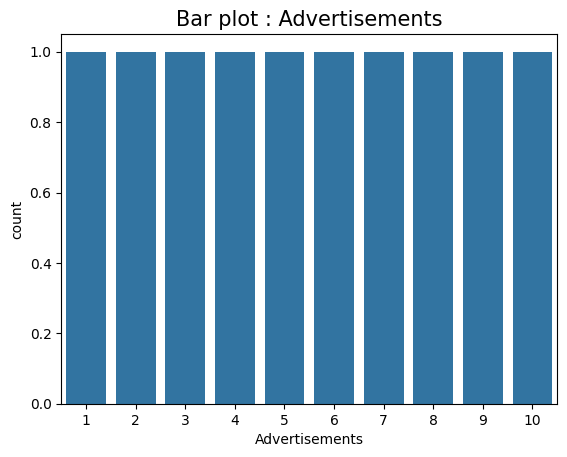

In [14]:
sns.countplot(x='Advertisements',data=df.head(25))
plt.title('Bar plot : Advertisements',fontsize = 15)

#### Histogram

Text(0.5, 0, 'Ad')

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


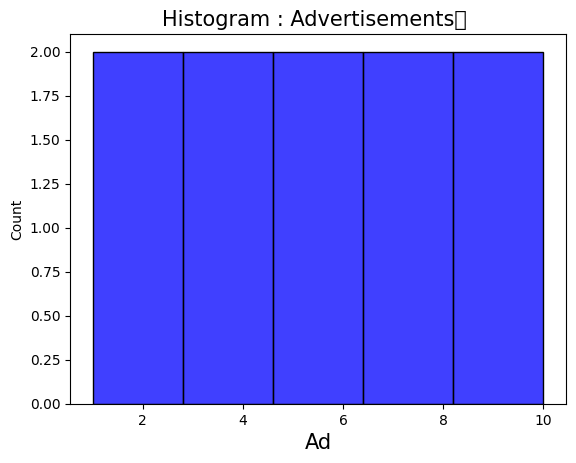

In [15]:
sns.histplot(x='Advertisements',data=df,color='b')
plt.title('Histogram : Advertisements	 ' , fontsize=15)
plt.xlabel('Ad',fontsize=15)

#### Box Plot

<Axes: xlabel='Advertisements'>

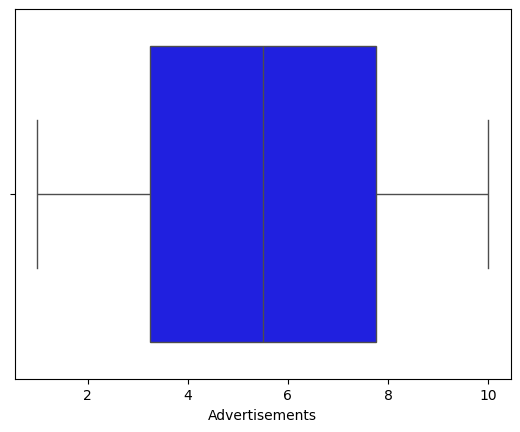

In [16]:
sns.boxplot(x='Advertisements',data=df,color='b')

Thus from the above Box Plot we can verify that the average Delivery time in minutes is 56.732 , which is calculated by the mean aggregration of the given data.

#### Scatter Plot

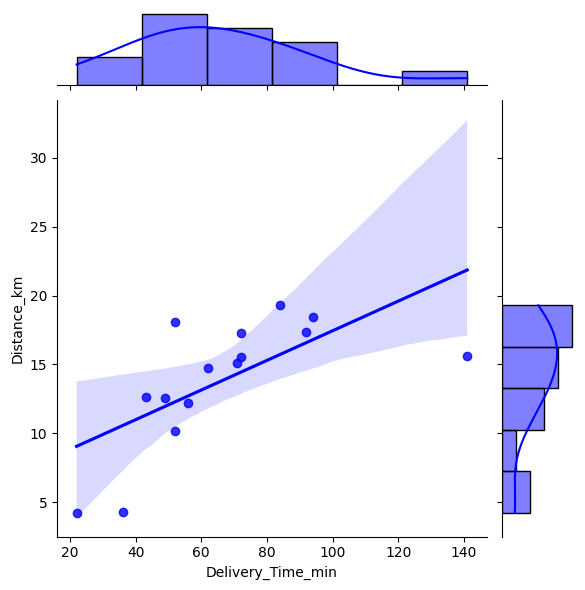

In [ ]:
sns.jointplot(x='Delivery_Time_min',y='Distance_km',data=df.sample(15),color='b',kind='reg')

#### Pair Plot

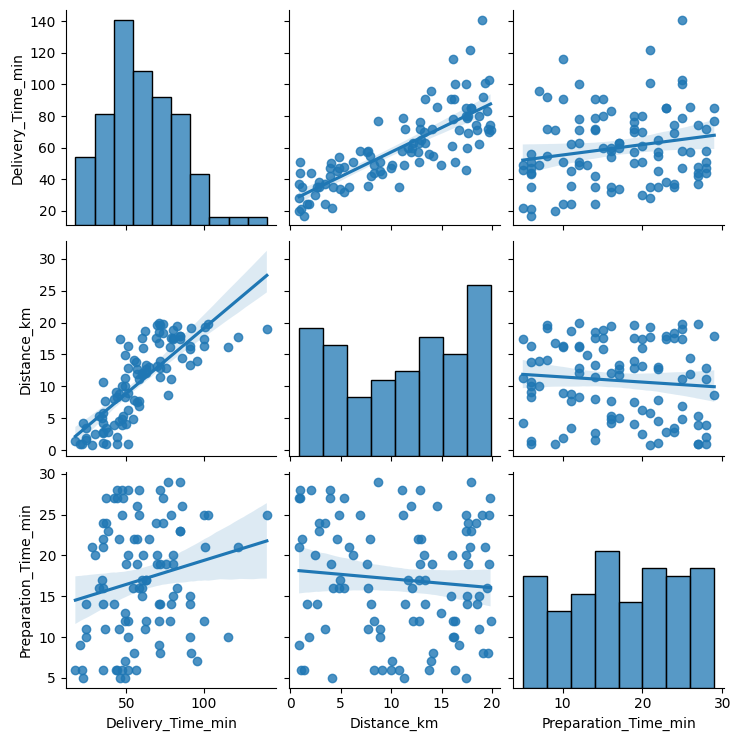

In [ ]:
d=df[['Delivery_Time_min','Distance_km','Preparation_Time_min']].sample(100)
sns.pairplot(d,kind='reg')

#### Label Encoder - To convert categorical values to numeric

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Weather'] = label_encoder.fit_transform(df['Weather'])
# Traffic_Level
df['Traffic_Level'] = label_encoder.fit_transform(df['Traffic_Level'])
# Time_of_Day
df['Time_of_Day'] = label_encoder.fit_transform(df['Time_of_Day'])
# Vehicle_Type
df['Vehicle_Type'] = label_encoder.fit_transform(df['Vehicle_Type'])

#### Heat Map

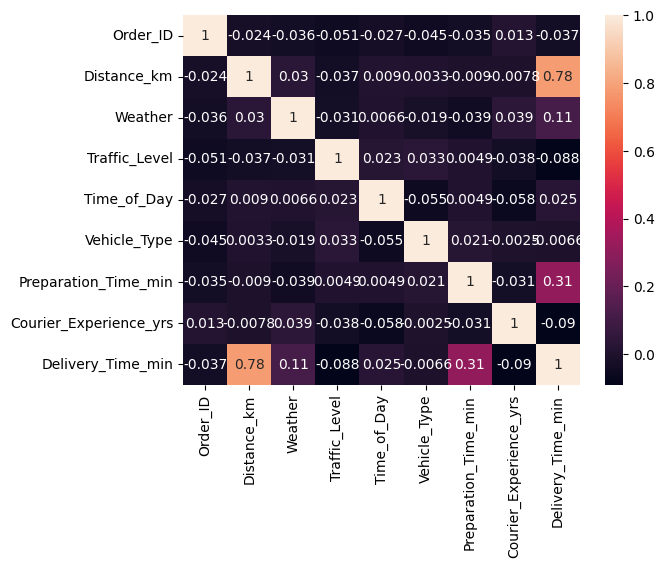

In [ ]:
corr=df.corr()
plt.figure(dpi=100)
sns.heatmap(df.corr(),annot=True)
plt.show()

#### Splitting variables

In [ ]:
x=df[['Distance_km']]
y=df['Delivery_Time_min']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

#### Fitting Linear Regression Model

In [ ]:
model=LinearRegression()

In [ ]:
model.fit(x_train,y_train)

LinearRegression()

#### Mean Absolute Error (MAE)

In [ ]:
from sklearn.metrics import mean_absolute_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mae = mean_absolute_error(y_true, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')


Mean Absolute Error (MAE): 0.5


#### Correlation Analysis - Coefficients

In [ ]:
print("\nModel Coefficients : ")
print(f"Intercept : {model.intercept_}")
print(f"Slope : {model.coef_[0]}")


Model Coefficients : 
Intercept : 26.585748176869686
Slope : 3.016469580679301


#### R squared Value

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
print("R squared value is : ",r2)

R squared value is :  0.6471386683659509


In [ ]:
if r2==1:
    print("The model fits perfectly explaining variance since R^2 is ",r2)
elif r2 >0.8:
    print("The model explains a strong proportion of the variance since R^2 is ",r2)
elif r2 > 0.5:
    print("The model explains a moderate proportion of the variance since R^2 is ",r2)
else:
    print("The model explains a weak proportion of the variance since R^2 is ",r2)

The model explains a moderate proportion of the variance since R^2 is  0.6471386683659509


Before preprocessing, we get r squared value to be approx 0.647 stating that the model is of moderate proportion.

#### Mean Squared Error

In [ ]:
from sklearn.metrics import mean_squared_error
y_pred= model.predict(x_test)
mse= mean_squared_error(y_test,y_pred)
print(f"Mean Squared Error (MSE): { mse:2f}")

Mean Squared Error (MSE): 158.161967


#### Now building the model after preprocessing the data

#### Data Preprocessing

Performing all the preprocessing works we may get a new r squared value and the model might be more appropriate

#### Treating Null values

In [ ]:
df.dropna(axis=0,inplace=True)

In [ ]:
df.isnull().sum()

,0
Order_ID,0
Distance_km,0
Weather,0
Traffic_Level,0
Time_of_Day,0
Vehicle_Type,0
Preparation_Time_min,0
Courier_Experience_yrs,0
Delivery_Time_min,0


#### Building Regression Model

#### Splitting the variables

In [ ]:
x=df[['Distance_km']]
y=df['Delivery_Time_min']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

#### Fitting Linear Regression Model

In [ ]:
model=LinearRegression()

In [ ]:
model.fit(x_train,y_train)

LinearRegression()

#### Mean Absolute Error (MAE)

In [ ]:
from sklearn.metrics import mean_absolute_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mae = mean_absolute_error(y_true, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

Mean Absolute Error (MAE): 0.5


#### Correlation Analysis - Coefficients

In [ ]:
print("\nModel Coefficients : ")
print(f"Intercept : {model.intercept_}")
print(f"Slope : {model.coef_[0]}")


Model Coefficients : 
Intercept : 26.764950487758384
Slope : 2.9705793166950607


#### R squared Value

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
print("R squared value is : ",r2)

R squared value is :  0.6766948802763137


In [ ]:
if r2==1:
    print("The model fits perfectly explaining variance since R^2 is ",r2)
elif r2 >0.8:
    print("The model explains a strong proportion of the variance since R^2 is ",r2)
elif r2 > 0.5:
    print("The model explains a moderate proportion of the variance since R^2 is ",r2)
else:
    print("The model explains a weak proportion of the variance since R^2 is ",r2)

The model explains a moderate proportion of the variance since R^2 is  0.6766948802763137




Before preprocessing, we get r squared value to be approx 0.647 stating that the model is of moderate proportion.


#### Mean Squared Error

In [ ]:
from sklearn.metrics import mean_squared_error
y_pred= model.predict(x_test)
mse= mean_squared_error(y_test,y_pred)
print(f"Mean Squared Error (MSE): { mse:2f}")

Mean Squared Error (MSE): 162.900217


### **TABULATION :-**

In [ ]:
from prettytable import PrettyTable

# Create table
table = PrettyTable()
table.field_names = ["Model", "R Squared Value", "Mean Squared Error (MSE)"]

# Add rows
table.add_row(["Before Preprocessing", 0.647, 158.161])
table.add_row([
    "After Preprocessing:\n- Treating Null values\n- Mapping categorical to numeric",
    0.676, 162.900
])

# Set column alignments
table.align["Model"] = "l"
table.align["R Squared Value"] = "c"
table.align["Mean Squared Error (MSE)"] = "c"

# Print table
print(table)


+----------------------------------+-----------------+--------------------------+
| Model                            | R Squared Value | Mean Squared Error (MSE) |
+----------------------------------+-----------------+--------------------------+
| Before Preprocessing             |      0.647      |         158.161          |
| After Preprocessing:             |      0.676      |          162.9           |
| - Treating Null values           |                 |                          |
| - Mapping categorical to numeric |                 |                          |
+----------------------------------+-----------------+--------------------------+


### **RESULT :-**

**The R² value shows a slight improvement after preprocessing (0.647 → 0.676), indicating a marginally better fit. However, the increase in Mean Squared Error (158.161 → 162.900) suggests that preprocessing may have introduced some variance, affecting prediction accuracy.**

**Thus we could conclude that R squared value before preprocessing is : 0.647 and after preprocessing is : 0.676 and the value of Mean Squared Error before preprocessing is : 158.161 and after preprocessing becomes : 162.900 .**